# Supervised Learning with sckit-learn
- William Surles
- 2017-11-27
- Datacamp class
- [https://www.datacamp.com/courses/supervised-learning-with-scikit-learn](https://www.datacamp.com/courses/supervised-learning-with-scikit-learn)

## Whats Covered
**Classification**
- Supervised learning
- Exploratory data analysis
- The classification challenge
- Measuring model performance

**Regression**
- Introduction to regression
- The basics of linear regression
- Cross-validation
- Regularized regression

**Fine-tuning your model**
- How good is your model?
- Logistic regression and the ROC curve
- Area under the ROC curve
- Hyperparameter tuning
- Hold-out set for final evaluation

**Preprocessing and pipelines**
- Preprocessing data
- Handling missing data
- Centering and scaling
- Final thoughts

## Additonal Resources

## Libraries and Data

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

/Users/williamsurles/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


# Classification

## Supervised learning

#### What is machine learning
- the art and science of:
 - Giving computers the ability to learn to make decisions from data
 - ... without being explicitly programmed!
- Examples:
 - Learning to predict whether an email is spam or not
 - Clustering wikipedia entries into different categories
- Supervised learning: Uses labeled data
- Unsupervised learning: uses unlabeled data
- Reinfocemnet learning: uses an environment with punishments and rewards to train future behavior

#### Unsupervised Learning
- Uncovering hidden patterns from unlabeled data
- Example:
 - Grouping customers into distinct categories (Clustering)
 
#### Reinforcement learning
- Software agents interact with an environment
 - Learn how to optimize their behavior
 - given a system fo rewards and punishments
 - Draws inspiration from behavioral pyschology
- Applications
 - Economics
 - Genetics
 - Game playing
- AlphaGo: First computer to defeat the world champion in Go

#### Supervised Learning
- Predictor variables/features and a target variable
- Aim: Predict the target variable, given the predictor variables
 - Classification: Target variable consists of categories
 - Regression: Target variable is continuous

**Naming Conventions**
 - Features = predictor variables = independent variables
 - Target variable = dependent variable = response variable

**In practice**
- Automate time-consuming or expensive maual tasks
 - Example: Doctor's diagnosis
- Make predictions about the future
 - Example: Will a customer click on an ad or not?
- Need Labeled data
 - Historical data with labels
 - Experiments to get labeled data
 - Crowd-sourcing labeled data
 
**In Python**
- We wil use scikit-learn/sklearn
 - Integrates well with the SciPy stack
- Other libaries
 - TensorFlow
 - keras


### Which of these is a classification problem?

- Classification (Supervised)
 - Using labeled financial data to predict whether the value of a stock will go up or go down next week.
- Regression (Supervised) 
 - Using labeled housing price data to predict the price of a new house based on various features.
 - Using labeled financial data to predict what the value of a stock will be next week.
- Clustering (Unsupervised)
 - Using unlabeled data to cluster the students of an online education company into different categories based on their learning styles.

## Exploratory data analysis

The Iris dataset
- Features:
 - Petal length
 - petal width
 - Sepal length
 - Sepal width
- Target variable: Species
 - Versicolor
 - Verginica
 - Setosa

#### The Iris dataset in scikit-learn

- This data comes in a 'Bunch' which is kind of like a dictionary.

In [3]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

- Here are the keys. We can see that the data and the target are separate. 
- Also the target is integers and the corresponding names are held in target_names
- There is also a description which is nice
- But the target_names and feature_names are separate
 - We will need to combine these as we do EDA on the data

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
iris.data[:6,:]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4]])

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [9]:
iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

#### EDA

In [10]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


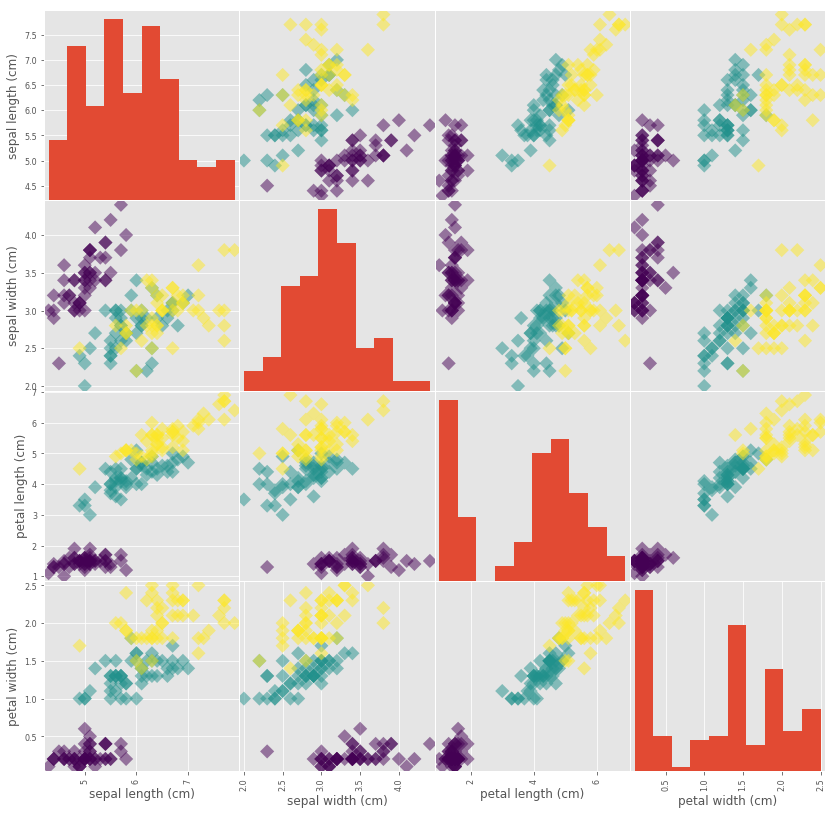

In [11]:
_ = pd.plotting.scatter_matrix(
    df,
    c = y,
    figsize = [14,14],
    s = 100,
    marker = 'D')
plt.show()

### Numerical EDA
- In this chapter, we'll be working with a dataset obtained from the UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen. 
- Our goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. 
- The data has been preproceesed
 - We will practice the processing techniques on this data in chp 4
- Before thinking about what supervised learning models we can apply to this, we will perform EDA in order to understand the structure of the data. 

In [12]:
%run data.py

In [13]:
vote_clean = pd.DataFrame(data = vote_clean_list, columns = vote_clean_columns)
vote_clean.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [14]:
vote_clean.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [15]:
vote_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(16), object(1)
memory usage: 57.9+ KB


In [16]:
vote_clean.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.558621,0.606897,0.406897,0.521839,0.650575,0.581609,0.590805,0.526437,0.512644,0.344828,0.393103,0.537931,0.609195,0.400000,0.857471
std,0.495630,0.497123,0.489002,0.491821,0.500098,0.477337,0.493863,0.492252,0.499876,0.500416,0.475859,0.489002,0.499133,0.488493,0.490462,0.349994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observations
- The dataframe has a total of 435 rows and 17 columns
- Except for `party`, all of the columns are of type `int64`.
- The first two rows of the dataframe consist of votes made by republicans, and then next three rows consist of votes made by democrats
- There are 16 _predictor variables_, or _features_, in this dataframe 
 - And one target variable, `party`.

### Visual EDA
- In the video we used the `scatter_matrix()` but here we have all binary data so a `countplot()` (from `seaborn`) is more appropriate.
 - We will look at the `countplot()` for a few variables
 - We will make the colors match the party affiliations

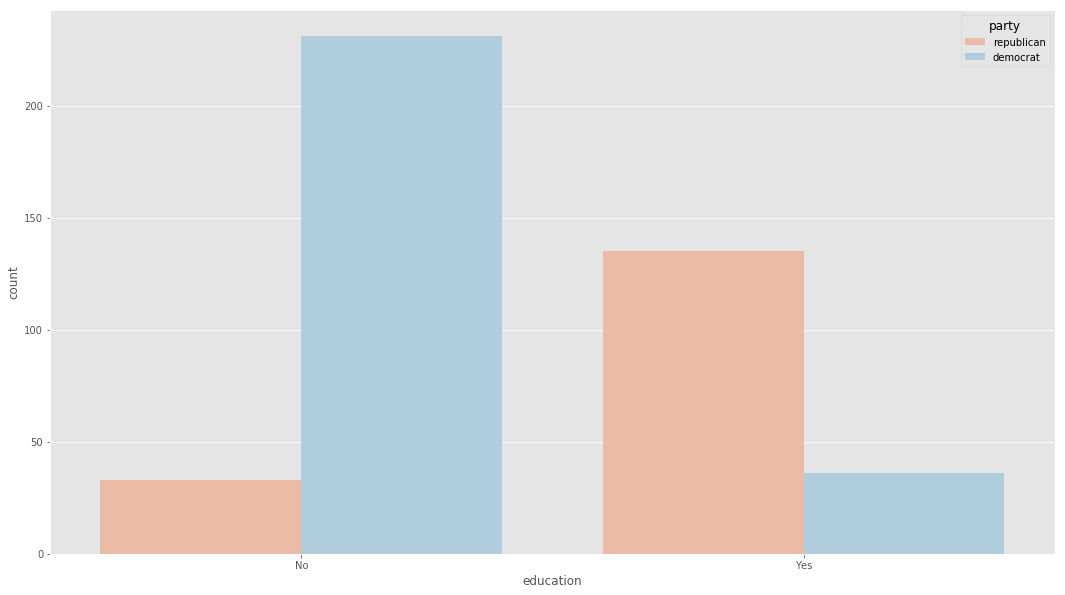

In [17]:
plt.figure(figsize=(18,10)) 
sns.countplot(x='education', hue='party', data=vote_clean, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

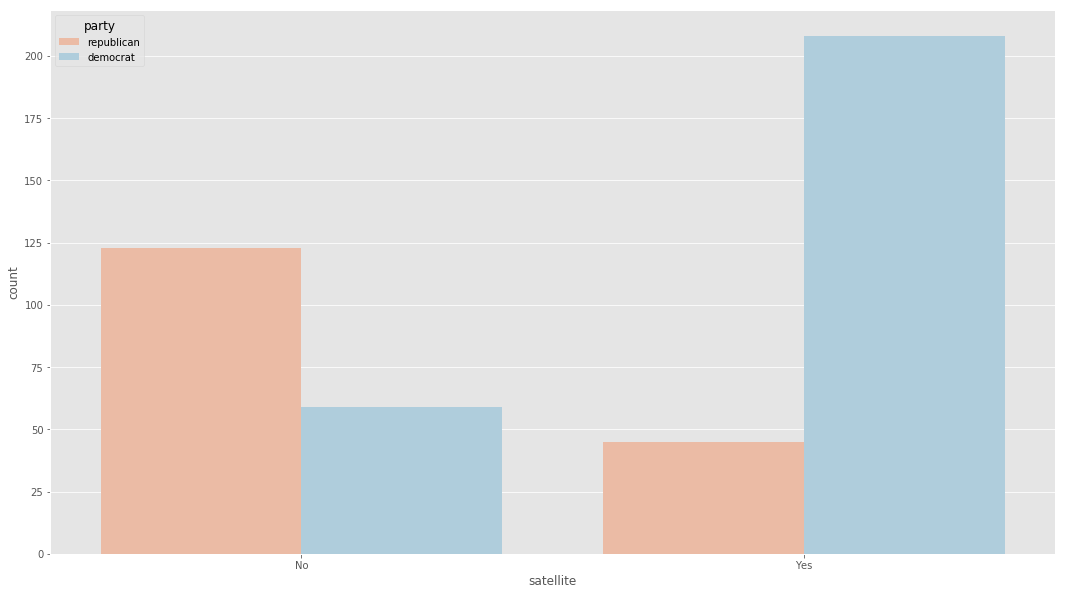

In [18]:
plt.figure(figsize=(18,10))
sns.countplot(x='satellite', hue='party', data=vote_clean, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

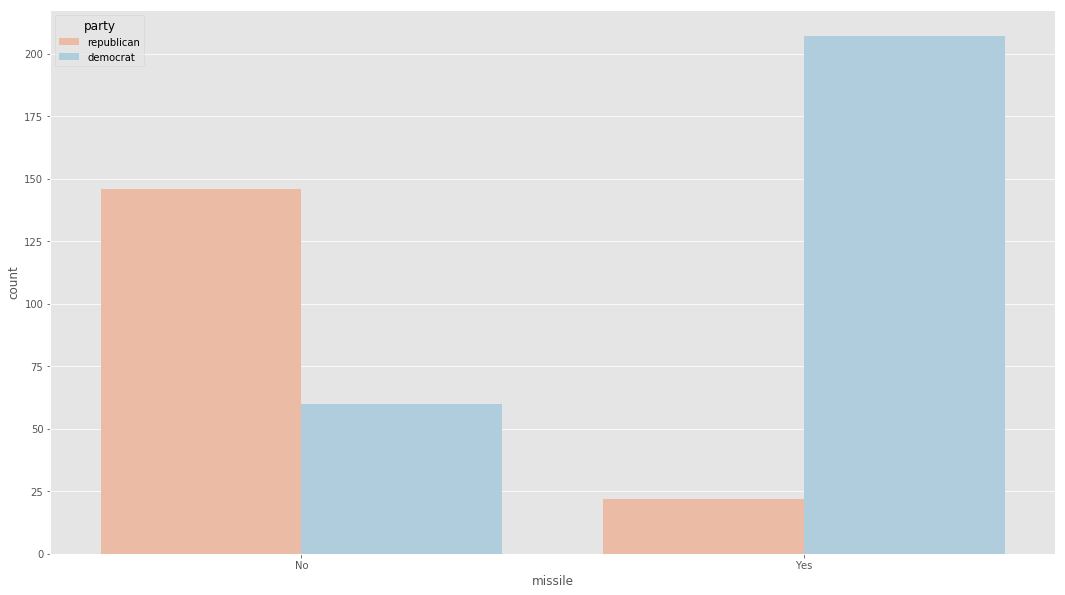

In [19]:
plt.figure(figsize=(18,10))
sns.countplot(x='missile', hue='party', data=vote_clean, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

#### Observations
- Repblicans wer much more in favor of education and more against the satelite and missile issue. 
- We don't know what the actual question was, but we can certainly see how the parties vote differently. 
- This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. 
 - An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

## The classification challenge

#### k-Nearest Neighbors
- Basic idea: Predict the label of a data point by
 - Looking at the 'k' closest labeled data points
 - Taking a majority vote

#### Oversimple example
- If it were knn 3 than the center dot would be red since its 3 nearest neighbors are 2 red and 1 green
- If it were knn 5 than it would be green. 3 green and 2 red  

<img src="images/knn_example.png" style="width: 500px;"/>


#### k-NN: Intuition
- At some point things converge and you have your groups

<img src="images/knn_intuition.png" style="width: 500px;"/>

#### Scikit-learn fit and predict
- All machine learning models implemented as python classes
 - They implement the algorithms for learning and predicting
 - Store the information learned from the data
- Training a model on the data = 'fitting' a model to the data
 - `.fit()` method
- To predict the labels of new data: 
 - `.predict()` method

#### Using scikit-learn to fit a classifier
- The scikit-learn api requires:
 - data as a numpy array or pandas data frame
 - the feature take on continuous values (like the price of a house, as opposed to a category, big or small house)
 - no missing values in the data
 - the features are in an array where each column is a feature and each row is an observation


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [21]:
iris['data'].shape

(150, 4)

In [22]:
iris['target'].shape

(150,)

#### Prediciting on unlabeled data

In [23]:
X_new = iris['data'][[0,10,100,149],:] + np.random.random((4, 4))
X_new

array([[ 5.98152014,  4.38435066,  1.43106267,  0.82202612],
       [ 5.54677668,  4.09813301,  2.22530634,  1.05753222],
       [ 6.65302452,  3.57896117,  6.57043984,  3.0251391 ],
       [ 5.98829296,  3.45623095,  5.87653347,  2.11225632]])

In [24]:
prediction = knn.predict(X_new)
X_new.shape
print('Prediction {}'. format(prediction))

Prediction [0 0 2 2]


- the first two are setosa and the second two are virginica

### k-Nearest Neighbors: Fit

- Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. 
- Without using .values, X and y are a DataFrame and Series respectively; 
 - the scikit-learn API will accept them in this form also as long as they are of the right shape.

In [25]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = vote_clean['party'].values
X = vote_clean.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

### k-Nearest Neighbors: Predict

- Having fit a k-NN classifier, you can now use it to predict the label of a new data point. 
 - However, there is no unlabeled data available since all of it was used to fit the model! 
 - You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

- In the next video we will cover splitting our data to fix this issues
 - For now, a random unlabeled data point has been generated and is available to you as X_new. 
 - You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. 
 - Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

In [26]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = vote_clean['party'].values
X = vote_clean.drop('party', axis = 1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)
print(y_pred[0:10])

['republican' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'republican' 'democrat']


In [27]:
# Predict and print the label for the new data point X_new
X_new = np.array([[0.72251225,  0.61952487,  0.25539929,  0.34978056,  0.04279606,
         0.64407096,  0.74224677,  0.26632645,  0.90179262,  0.73532079,
         0.96163873,  0.98119655,  0.79379732,  0.29022046,  0.44359749,
         0.95018481]])

In [28]:
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


## Measuring model performance

- In classification, accuracy is a commonly used metric
- Accuracy = Fraction of correct predictions
- Which data should be used to compute accuracy?
- How well will the model perform on new data?
- Could compute accuracy on data used to fit classifier...
 - Not indicative of ability to generalize
- Split data into Training and test set
 - Fit/train the classifier on the training set
 - make predictions on test set
 - Compare predictions with the known labels

#### Train/test split
- `test_size` is the proportion of data that will be in the test set
- `random_state` sets a seed for the random number generator so later you can reporoduce you results later
- `stratify` ensures that our data is split so it has similar ratios of target labels in both test and train as in the original data

In [29]:
from sklearn.model_selection import train_test_split

X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 21, 
    stratify = y)

- Now we just train on the train data
- And test on the test data
- then we can score by comaring our y predictions to the actual y test data

In [30]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions:\n{}".format(y_pred))

Test set predictions:
[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [31]:
knn.score(X_test, y_test)

0.9555555555555556

#### Model complexity
- If we use very few neighbors we will get a more jagged decision boundary
 - This will over fit data so that new data is not predictied as well
- Many neighbors will lead to a very smooth decision boundary. 
 - this may underfit the data so our model cannnot describe the data as accurately as needed
 
<img src="images/model_complexity.png" style="width: 700px;"/>

#### Model complexity and over/underfitting
- Here we can see that if our model is **too** simple (as in very large n) it does not do well on the training or test data.
- If we just set the neighbors to 1 you will have a very complex model that fits the training data very tightly, but when applying that model to the test data it will be low acuracy becuase its over fit on the training data. 
- We want to find the sweet spot in the middle where we get the highes accuracy on new data. 
 - This will probably never be as good as any of the models fit to the training data but the point is to predict new data so thats how it is.
 
<img src="images/model_complexity_curve.png" style="width: 500px;"/>

### The digits recognition dataset

- In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! 
 - A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.
- Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. 
 - Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. 
 - Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys  - Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images

In [32]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [33]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


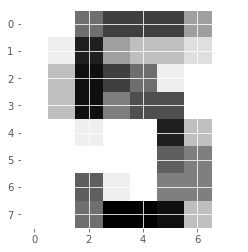

In [34]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Train/Test Split + Fit/Predict/Accuracy

In [35]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2, 
    random_state = 42, 
    stratify = y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.983333333333


- Okay so in a split second, this out of the box knn model predicts the hand written digits with over 98% accuracy.
- Thats impressive for sure
- I think I am on to the bginning of something magical here

### Overfitting and underfitting

- We will now construct such a model complexity curve for the digits dataset! 
- In this exercise, we will compute and plot the training and testing accuracy scores for a variety of different neighbor values. 
- By observing how the accuracy scores differ for the training and testing sets with different values of k, we will develop our intuition for overfitting and underfitting

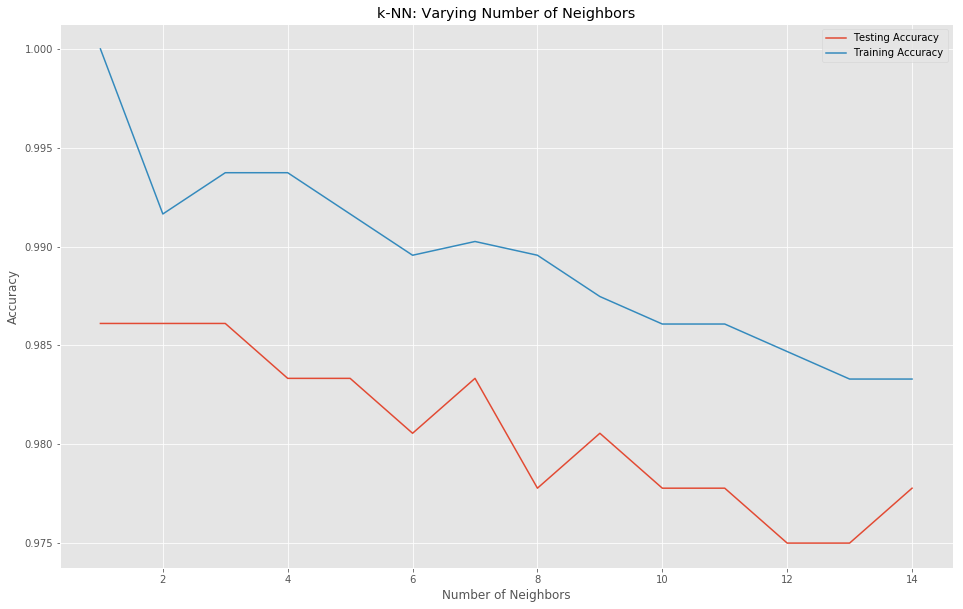

In [36]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.figure(figsize=(16,10))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


- Welp, it looks like our value of 7 neighbors may be to many and creating an over simple model. 
 - Its seems to drop off after that. 
 - Probably 3 would be the best model to use here. 

# Regression

## Introduction to regression

#### Boston housing data

In [37]:
file = 'https://assets.datacamp.com/production/course_1939/datasets/boston.csv'
boston = pd.read_csv(file)
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Creating feature and target arrays

In [38]:
X = boston.drop('MEDV', axis = 1).values
y = boston['MEDV'].values

#### Predicting house value from a single feature

In [39]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [40]:
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1, 1)

#### Plotting house values vs. number of rooms

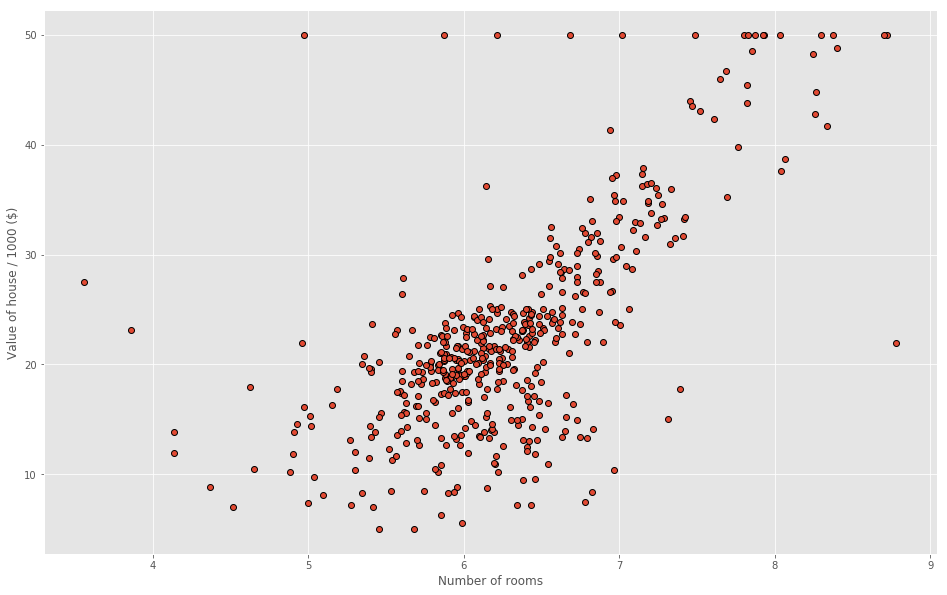

In [41]:
plt.figure(figsize=(16,10))
plt.plot(X_rooms, y,
    marker='o',
    markersize = 6,
    markeredgewidth = 1,
    markeredgecolor = 'k',
    linestyle='none')
plt.ylabel('Value of house / 1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

#### Fitting a regression model

In [42]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(X_rooms, y)

prediction_space = np.linspace(
    min(X_rooms),
    max(X_rooms)).reshape(-1,1)

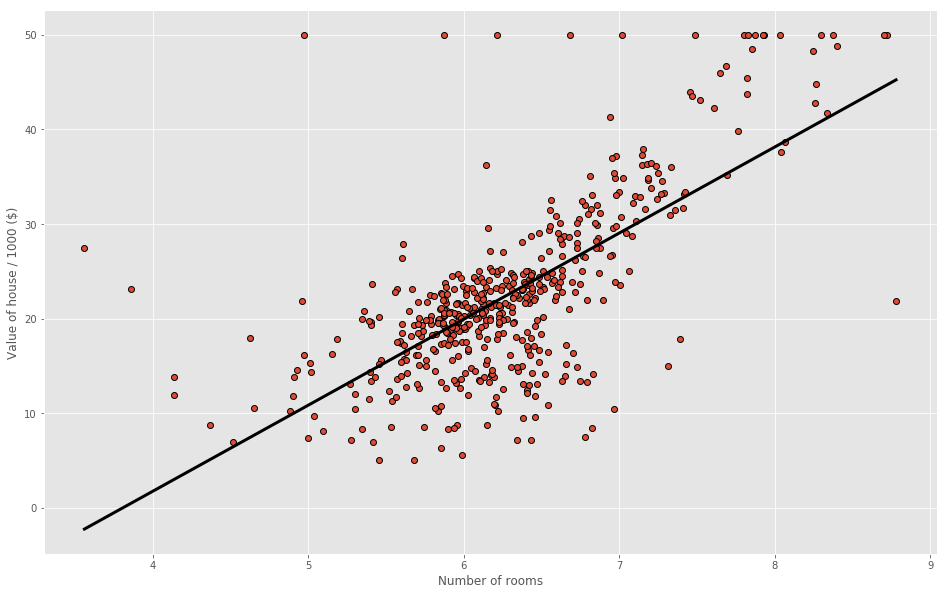

In [43]:
plt.figure(figsize=(16,10))

plt.plot(X_rooms, y,
    marker='o',
    markersize = 6,
    markeredgewidth = 1,
    markeredgecolor = 'k',
    linestyle='none')

plt.plot(
    prediction_space, 
    reg.predict(prediction_space), 
    color = 'black',
    linewidth=3)

plt.ylabel('Value of house / 1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

### Importing data for supervised learning

- In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. 
 - Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. 
 - As in Chapter 1, the dataset has been preprocessed.
- Since the target variable here is quantitative, this is a regression problem. 
 - To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. 
 - In later exercises, you will use all the features to build regression models.
- You need to import the data and get it into the form needed by scikit-learn. 
 - This involves creating feature and target variable arrays. 
 - Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. 
 - You will have to do this occasionally when working with scikit-learn so it is useful to practice.

In [44]:
file = 'https://assets.datacamp.com/production/course_1939/datasets/gm_2008_region.csv'
gapminder = pd.read_csv(file)
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [45]:
# Create arrays for features and target variable
y = gapminder.life
X = gapminder.fertility

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))


Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


/Users/williamsurles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/Users/williamsurles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()


### Exploring the Gapminder data

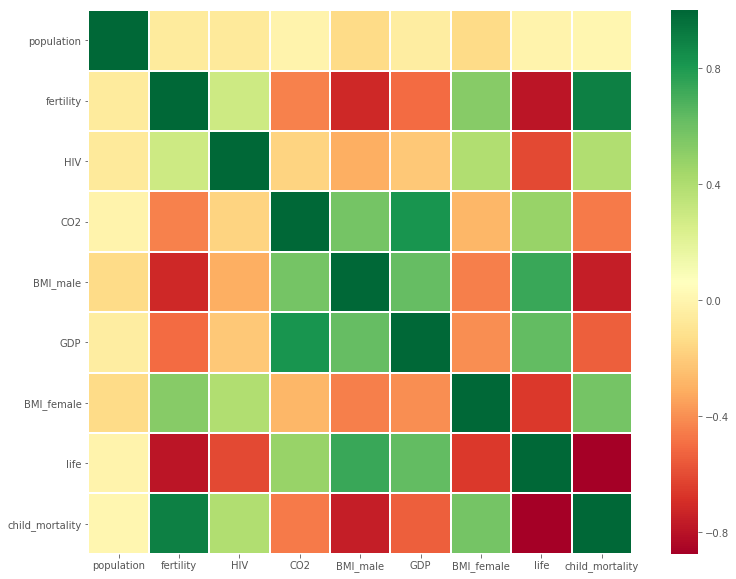

In [46]:
plt.figure(figsize=(14,10))

sns.heatmap(
    gapminder.corr(), 
    square = True,
    cmap="RdYlGn",
    linewidths = 1)

plt.show()

In [47]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [48]:
gapminder.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


## The basics of linear regression

#### Regression mechanics
- We will fit a line to the data with form:
 - y = ax + b
 - y = target
 - x = single feature
 - a,b = parameters of model
- How do we choose a and b?
 - Define an error function for any given line
 - Choose the line that minimized the error function
 - This erro function can also be called a loss or cost function
 
#### The loss function
- Intitavely, we want the line to be as close to the actual data points as possible
- So we wish to minimize the vertical distance between the fit (line) and the data
 - For each data point we calculate the vertical distance between it and the line
 - This distance is called a residual
- We minimize the sum of the squares of the residuals
 - I'd like to learn more about all the options here though
 - this is called ordinary least squares (OLS)
 - This is similar to minimizing the mean squarred error of the predictions on the training set
- When you call `.fit()` on a linear regression model in scikit-learn it performs this OLS under the hood

#### Linear regression in higher dimension

- To fit a linear regression model here:
 - $ y = a_1x_1 + a_2x_2 + b $
 - Need to specify 3 variables, a_1, a_2, and b
- In higher simension:
 - $ y = a_1x_1 + a_2x_2 + a_3x_3 + a_nx_n + b $
 - Must specify coefficient for each feature and the variable b
- Scikit-learn API works exactly the same way:
 - Pass two arrays: Features, and target

#### Linear regression on all features

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3, 
    random_state = 42)

reg_all = linear_model.LinearRegression()

reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

reg_all.score(X_test, y_test)
    

0.72989873609074984

- The default scoring method for linear regression is called r-squared
 - Intuitiavely this feature quantifies the amount of variance in the target variable that is predicted from the feature variables
- Also not the you will likely never use linear regression out of the boc like this
 - we will use regularization to place further constraints on the model coefficents
 - we will cover this later in the chapter

### Fit & predict for regression

In [50]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [51]:
X_fertility = gapminder.fertility.values.reshape(-1, 1)
y = gapminder.life.values

In [52]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(
    min(X_fertility), 
    max(X_fertility)
    ).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

0.619244216774


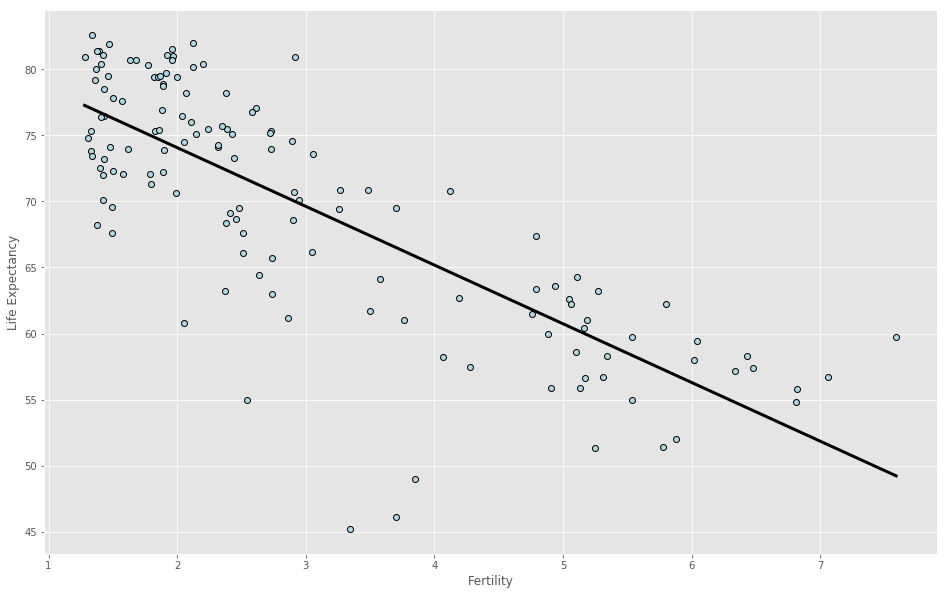

In [53]:
plt.figure(figsize=(16,10))

plt.plot(X_fertility, y,
    marker='o',     
    markersize = 6,
    color = 'lightblue',
    markeredgewidth = 1,
    markeredgecolor = 'k',
    linestyle='none')

plt.plot(
    prediction_space, 
    y_pred, 
    color = 'black',
    linewidth=3)

plt.ylabel('Life Expectancy')
plt.xlabel('Fertility')
plt.show()

### Train/test split for regression

- As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. 
- This was true for classification models, and is equally true for linear regression models.

In [54]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [55]:
X = gapminder.drop(['life','Region'], axis = 1).values
y = gapminder.life.values

In [56]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3, 
    random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.8380468731430138
Root Mean Squared Error: 3.247601080036943


- Cool, we have improved our model significantly by using all of the data

## Cross-validation

- One issue with just doing 1 train and test validation
 - Model performance is dependent on way the data is split
 - Not representative of the models's ability to generalize
- Solution - Cross-validation

<img src="images/cross_validation.png" style="width:600px;">

#### Cross-validation and model performance
- 5 folds = 5-fold CV
- 10 folds = 10-fold CV
- k folds = k-fold CV
- More folds = More computationally expensive

#### Cross-validation in scikit-learn

In [57]:
X = boston.drop('MEDV', axis = 1).values
y = boston['MEDV'].values

from sklearn.model_selection import cross_val_score

reg = linear_model.LinearRegression()

cv_results = cross_val_score(reg, X, y, cv = 5)

print(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [58]:
np.mean(cv_results)

0.35327592439586775

### 5-fold cross-validation

- Cross-validation is a vital step in evaluating a model. 
 - It maximizes the amount of data that is used to train the model
 - as during the course of training, the model is not only trained, but also tested on all of the available data.

- By default, scikit-learn's cross_val_score() function uses R2R2 as the metric of choice for regression. 
- Since you are performing 5-fold cross-validation, the function will return 5 scores. 

In [59]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = gapminder.drop(['life','Region'], axis = 1).values
y = gapminder.life.values

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

[ 0.81720569  0.82917058  0.90214134  0.80633989  0.94495637]


In [60]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.8599627722793508


### K-Fold CV comparison

In [61]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

0.871871278262


In [62]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

0.843612862013


In [63]:
%timeit cross_val_score(reg, X, y, cv = 3)

2.49 ms ± 210 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [64]:
%timeit cross_val_score(reg, X, y, cv = 10)

8.91 ms ± 882 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Regularized regression

#### Why regularize?
- Recall: Linear regression minimizes a loss function
- It chooses a coefficient for each feature value
- Large coefficients can lead to overfitting
- Penalizing large coeefficients: Regularization
- My explaination
 - It sounds like what will inevitably happen is that our linear regression will overfit to some of the background noice. And the regularization penalizes the model when it gets too complex. So it keeps it more simple, which in general is more likely to fit future data better. 
 - Its kinda like penalizing a k-means with a higher k-neighbors because you already know intuitively that if it is too high, you are overfitting. 
 - I'm sure you can tweek the regularization parameter between none and a lot to control the complexity/simplicity of the model and create a complexity curve with cross validation. This will take some time but it would shows that you do need to keep you model simple at some level. 

#### Rigde Regression
- Loss function = OLS Loss function + $ \alpha * \sum_{i=1}^n{a_i^2}$
 - That is, the new loss function is the original plus the squared value of each coefficient times alpha. 
- Alpha: parameter we need to choose
- Picking alpha here is similar to picking k in k-NN
- Hyperparameter tuning (more in chapter 3)
- Alpha (also called lambda in the wild) controls model complexity
 - Alpha = 0: We get back OLS (Can lead to overfitting)
 - Very high alpha: Can lead to underfitting

- My words
 - If alpha is zero the regularization goes to zero. 
 - This means that the model will want to minimize coefficents that are not strongly fit rather than take the penalty.
 - So when prediciting salary from a bunch of variables, the coefficient on shoe size is lowered as much as possible. The coefficient on education is high but it helps the model so much that it stays high, but maybe not quite as high as it would have been without regularization. 

#### Ridge regression in scikit-learn
- We set alpha
- We also normalize the data

In [65]:
from sklearn.linear_model import Ridge

X = boston.drop('MEDV', axis = 1).values
y = boston['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3, 
    random_state = 42)

ridge = Ridge(alpha=0.1, normalize=True)

ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

ridge.score(X_test, y_test)

0.69969382751273179

#### Lasso regression
- Loss function = OLS loss function + $ \alpha * \sum_{i=1}^{n}|a_i| $
- This is similar but we add the absolute value of each coefficient times alpha

In [66]:
from sklearn.linear_model import Lasso

X = boston.drop('MEDV', axis = 1).values
y = boston['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3, 
    random_state = 42)

lasso = Lasso(alpha=0.1, normalize=True)

lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

lasso.score(X_test, y_test)

0.59502295353285506

#### Lasso regression for feature selection
- Can be used to select important features of a dataset
- Shrinks the coefficients of less important features to exactly 0


#### Lasso for feature selection in sckkit-learn

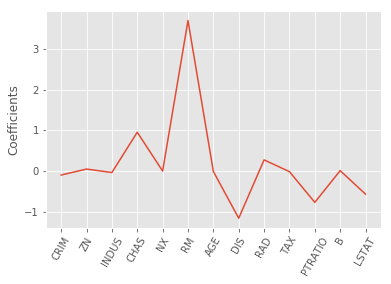

In [67]:
names = boston.drop('MEDV', axis = 1).columns

lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X, y).coef_

_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

- This is very important because it allows us to better communicate what matters in the model. 
 - You cant overstate how useful it is to hae the coefficients of the model to explain what matters.

### Regularization I: Lasso

/Users/williamsurles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  app.launch_new_instance()
/Users/williamsurles/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/williamsurles/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


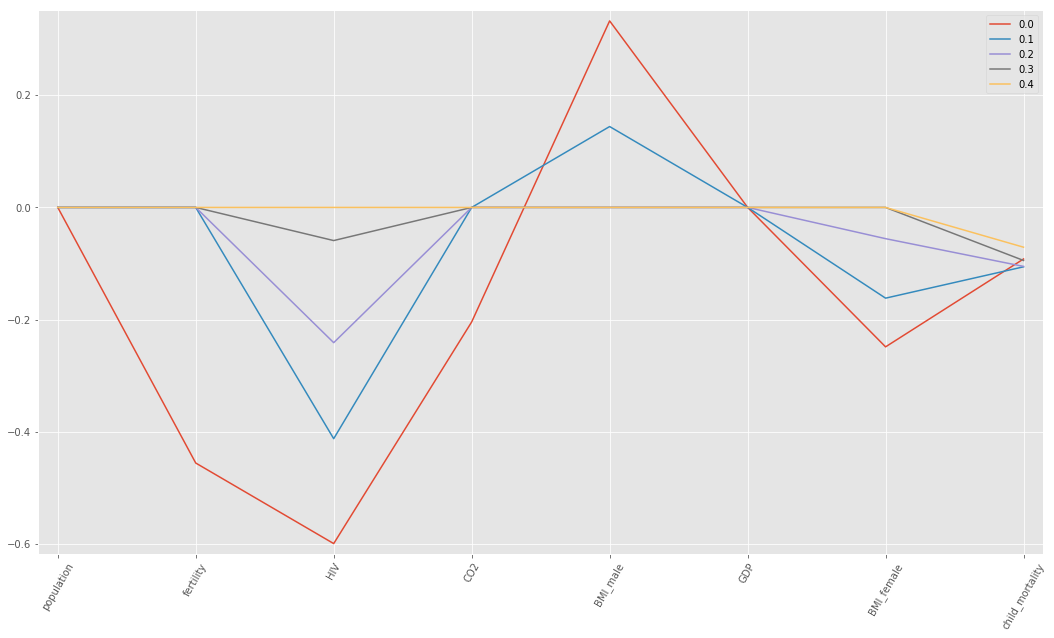

In [68]:
# Import Lasso
from sklearn.linear_model import Lasso

columns = gapminder.drop(['life','Region'], axis = 1).columns
X = gapminder.drop(['life','Region'], axis = 1).values
y = gapminder.life.values

plt.figure(figsize=(18,10))

for i in range(0,5):

    # Instantiate a lasso regressor: lasso
    lasso = Lasso(alpha = i*0.1, normalize = True)

    # Fit the regressor to the data
    lasso.fit(X, y)

    # Compute and print the coefficients
    lasso_coef = lasso.coef_

    # Plot the coefficients
    plt.plot(range(len(columns)), lasso_coef, label = str(round(i*0.1, 1)))
    plt.xticks(range(len(columns)), columns.values, rotation=60)
    plt.margins(0.02)

plt.legend()    
plt.show()


- As alpha is increased you see many of the parameters being removed completely.
- Child_mortality is the most important
- It also looks like HIV and BMI_female may matter
- It seems weird how fertility can be so high and then drop out completely when alpha goes from 0 to .1

### Regularization II: Ridge

- Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.
- Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. 
 - This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. 
 - This is not the only way to regularize, however.
- If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2 norm. 

In [69]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure(figsize=(18,10))
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores, marker = 'o')

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [70]:
X = gapminder.drop(['life','Region'], axis = 1).values
y = gapminder.life.values

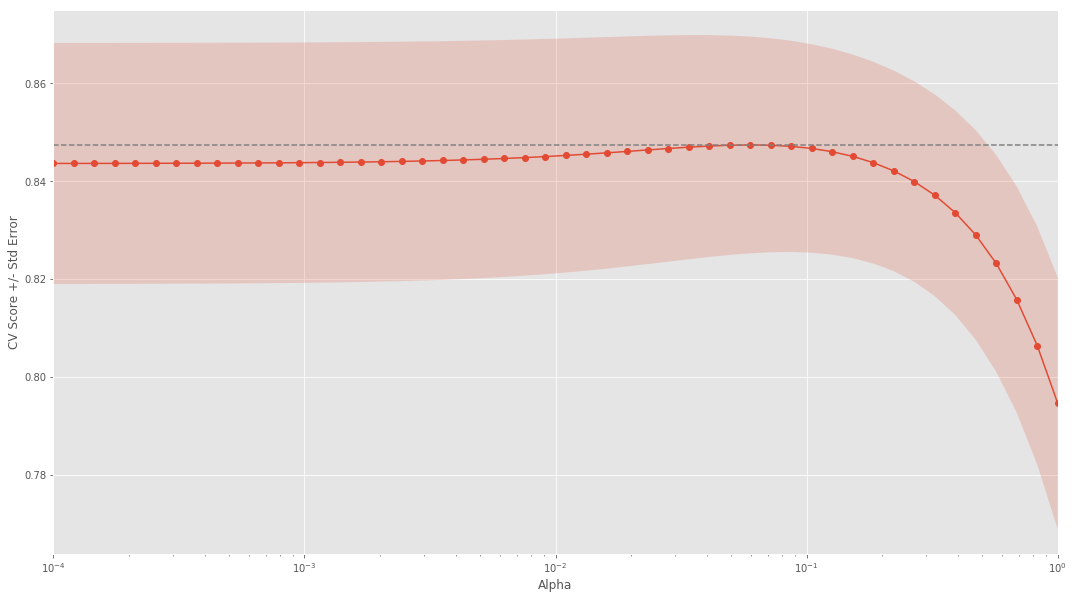

In [71]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = 10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


# Fine-tuning your model

## How good is your model?

#### Classification metrics
- Measuring model performance with accuracy:
 - Fraction of correctly classified samples
 - Not always a useful metric

#### Class imbalance example: Emails
- Spam classification
 - 99% of emails are real, 1% are spam
- Could build a classifier that predicts ALL emails as real
 - 99% accurate!
 - But horrible at actually classifying spam
 - Fails at its originial purpose
- Need more nuanced metrics

#### Diagnosing classification predictions
- Confusion matrix
 - Which class you choose to be the positive class is up to you
 - in the spam cas we could select spam because that is what we are trying to predict

<img src="images/confusion_matrix.png" style="width: 500px;"/>

- Accuracy: $$ \frac{True\ Pos + True\ Neg}{Sum\ of\ Matrix} $$

#### Metrics from the confusion matrix
- Precision:
 - The correclty classified spam email divided by all classified spam emails
 - High precision: Not many real emails predicted as spam
 
 $$ \frac{TP}{TP + FP} $$

- Recall:
 - Also called sensitivity, hit rate, or true positive rate
 - I like this better because it wont be 100% if you just classify 1 spam email correctly
 - High recall: Predicted most spam emails correctly
 
 $$ \frac{TP}{TP + FN} $$

- F1 score: 
 - This is the harmonic mean of precision and recall
 
 $$ 2 * \frac{precision * recall}{precision + recall} $$ 


#### Confusion matrix in scikit-learn

In [72]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors = 8)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.4, 
    random_state = 42)
    
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [73]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        23
          1       0.95      1.00      0.97        19
          2       1.00      0.94      0.97        18

avg / total       0.98      0.98      0.98        60



### Metrics for classification

- The support is the number of samples of the true responses that lie in that class.
- In this exercise we will work with the PIMA Indians dataset obtained from the UCI Machine learning repository. 
- The goal is to predict whether or not a given femaile patient will contract diabetes based on fetures such as BMI, age, and number of pregnancies
 - Therefore, it is a binary classification problem. 
 - A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.
 - The data set has already been preprocessed to deal with missing values.

In [74]:
file = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'
diabetes = pd.read_csv(file)
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
# Import necessary modules
from sklearn.metrics import classification_report, confusion_matrix

X = diabetes.drop(['diabetes'], axis = 1).values
y = diabetes.diabetes.values

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.4, 
    random_state = 42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))

[[176  30]
 [ 56  46]]


In [77]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.76      0.85      0.80       206
          1       0.61      0.45      0.52       102

avg / total       0.71      0.72      0.71       308



## Logistic regression and the ROC curve

#### Logistic regression for binary classification
- Despite its name, logisitic regression is used for classification problems, not regression problems
 - Its not predicting a value but a decision boundary. 
- Logistic regression outputs probabilities
- If the probability 'p' is greater than 0.5:
 - The data is labeled '1'
- If the probability 'p' is less than 0.5:
 - The data is labeled '0'
- There is, in essense, a linear decision boundary where the pobability is 0.5

#### Logistic Regression steps
- These are the same as what we have done for the other methods
 - Perform the necessary imports
 - Instantiate the classifier
 - Split your data into training and test sets
 - Fit the model on your training data
 - Predict on your test set

#### Logistic regression in scikit-learn

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()

y = vote_clean['party'].values
X = vote_clean.drop('party', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

y_pred[:6]

array(['democrat', 'democrat', 'republican', 'republican', 'republican',
       'republican'], dtype=object)

#### Probability thresholds
- By default, logistic regression threshold = 0.5
- Not specific to logistic regression
 - k-NN classifiers also have thresholds
- What happens if we vary the threshold?
 - This is what the ROC curve shows us

#### Plotting the ROC curve
Notes:
 - First I had an error that stated
 - "ValueError: Data is not binary and pos_label is not specified"
 - I have to convert the y_test array to be boolean. It originally is a label of democrat or republican. 
  - I can see that the republican label is associated with 1 so this is an easy change

In [92]:
y_test[0:6]

array(['democrat', 'democrat', 'republican', 'republican', 'republican',
       'republican'], dtype=object)

In [93]:
y_pred_prob[:6]

array([ 0.19938423,  0.0444335 ,  0.9862565 ,  0.93607015,  0.81279444,
        0.93607015])

In [98]:
y_test_bool = y_test == 'republican'
y_test_bool[:6]

array([False, False,  True,  True,  True,  True], dtype=bool)

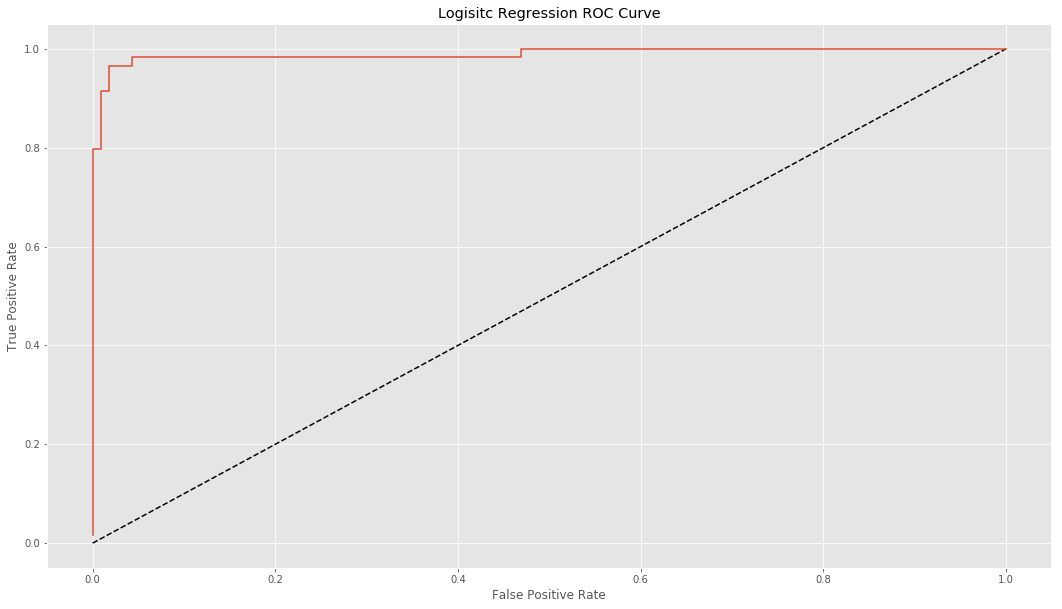

In [99]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test_bool, y_pred_prob)

plt.figure(figsize=(18,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logisitc Regression ROC Curve')
plt.show()

### Building a logistic regression model

In [100]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

X = diabetes.drop(['diabetes'], axis = 1).values
y = diabetes.diabetes.values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[174  32]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.84       206
          1       0.67      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



### Plotting an ROC curve
- Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models.
- Most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in a particular class. 

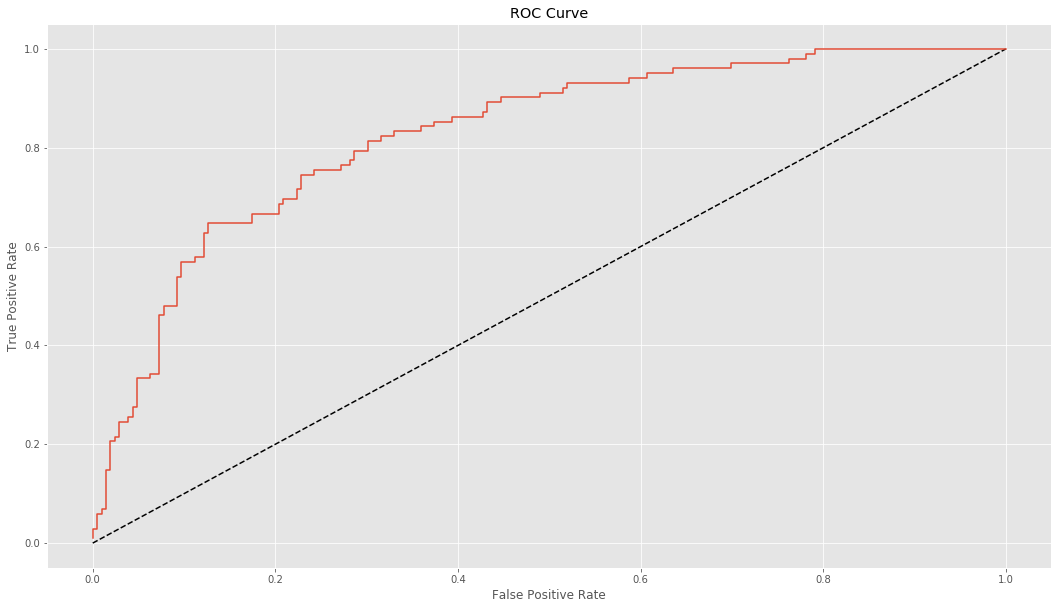

In [102]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(18,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Precision-recall Curve

![](images/precision_recall.png)

- A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did not have diabetes.
- Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes.
- When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.


## Area under the ROC curve

#### Area under the ROC curve (AUC)
- Larger area under the ROC curve = better model
- The top left is where you want your model to be. Catch all the true positives but make few or no false positives. 

#### AUC in scikit-learn

In [109]:
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression()

y = vote_clean['party'].values == 'republican'
X = vote_clean.drop('party', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.4,
    random_state = 42)

logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test, y_pred_prob)

0.98938835666912306

#### AUC using cross-validation

In [111]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y, cv = 5, scoring = 'roc_auc')
print(cv_scores)

[ 0.99673203  0.99183007  0.99583796  1.          0.96140652]


### AUC computation
- Say you have a binary classifier that in fact is just randomly making guesses. 
- It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. 
- The Area under this ROC curve would be 0.5. 
- If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In [112]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

X = diabetes.drop(['diabetes'], axis = 1).values
y = diabetes.diabetes.values

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.9893883566691231
AUC scores computed using 5-fold cross-validation: [ 0.7987037   0.80777778  0.81944444  0.86622642  0.85132075]


## Hyperparameter tuning

#### Hyperparmeter tuning
- Linear regresion: Choosing parmeters
- Ridge/lasso regression: Choosing alpha
- K-Nearest Neighbors: CHoosing n_neighbors
- Paramters like alpha and k: Hyperparameters
 - Cannot be learned by fitting the model
 
#### Choosing the correct hyperparameter
- Hyperparameter tuning method
 - Try a bunch of different hyperparmeter values
 - Fit all of them separately
 - See how well each performs
 - Choose the best performing one
- This is the current fashion for doing it. 
 - If you come up with a better way, you many become famous
- Its essential to use cross-validation
 - Using a single train test risks over fitting the hyperparameter to the test data
 
#### Grid search cross-validation
<img src="images/grid_search.png" style="width:600px;"/>


#### GridSearchCV in scikit-learn

In [113]:
from sklearn.model_selection import GridSearchCV

y = vote_clean['party'].values
X = vote_clean.drop('party', axis=1).values

param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X,y)

print(knn_cv.best_params_)

print(knn_cv.best_score_)


{'n_neighbors': 4}
0.931034482759


### Hyperparameter tuning with GridSearchCV

- Hugo demonstrated how to tune the n_neighbors parameter of the KNeighborsClassifier() using GridSearchCV on the voting dataset. 
- You will now practice this yourself, but by using logistic regression on the diabetes dataset instead!
- Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: `C`. 
 - `C` controls the inverse of the regularization strength, and this is what you will tune in this exercise. 
 - A large `C` can lead to an overfit model, while a small CC can lead to an underfit model.
- Here we are just practicing using the grid. 
 - In practice we would be using trianing and test data

In [114]:
X = diabetes.drop(['diabetes'], axis = 1).values
y = diabetes.diabetes.values

# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))



Tuned Logistic Regression Parameters: {'C': 268.26957952797272}
Best score is 0.7708333333333334


### Hyperparameter tuning with RandomizedSearchCV

- GridSearchCV can be computationally expensive 
 - especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. 
- A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. 
 - Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. 

- Here, we are using the Decision Tree, because its suited to the Random search. 
 - Don't worry about the specifics of how this model works, for now. 
 - Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have .fit() and .predict() methods that you can use in exactly the same way as before. 
 - Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf.
 - This makes it an ideal use case for RandomizedSearchCV.

In [115]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1}
Best score is 0.7395833333333334


- You'll see a lot more of decision trees and RandomizedSearchCV as you continue your machine learning journey. 
- Note that `RandomizedSearchCV` will never outperform `GridSearchCV`. 
 - Instead, it is valuable because it saves on computation time.

## Hold-out set for final evaluation

#### Hold-out set reasoning
- How well can the model perform on never before seen data?
- Using ALL data for cross-validation is not ideal
- Split data into training and hold-out set at the beginning
- Perform grid search cross-validation on training set
- Choose best hyperparameters and evaluate on hold-out set

### Hold-out set in practice I: Classification
- In addition to `C`, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. 
- Your job in this exercise is 
 - to create a hold-out set, 
 - tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set 
 - evaluate its performance against the hold-out set.

In [117]:
# Set features and target data
X = diabetes.drop(['diabetes'], axis = 1).values
y = diabetes.diabetes.values

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C':c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.4,
    random_state = 42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


### Hold-out set in practice II: Regression
- Lasso used the `L1` penalty to regularize, while ridge used the `L2` penalty. 
- There is another type of regularized regression known as the elastic net. 
 - In elastic net regularization, the penalty term is a linear combination of the `L1` and `L2` penalties:

$$ a∗L1+b∗L2 $$

- In scikit-learn, this term is represented by the 'l1_ratio' parameter: 
 - An 'l1_ratio' of 1 corresponds to an `L1` penalty, and anything lower is a combination of `L1` and `L2`.

In [135]:
X = gapminder.drop(['life','Region'], axis = 1).values
y = gapminder.life.values

# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.4, 
    random_state = 42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


/Users/williamsurles/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/williamsurles/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/williamsurles/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/williamsurles/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Converge

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460283
Tuned ElasticNet MSE: 10.05791413339844


# Preprocessing and pipelines

## Preprocessing data

#### Dealing with categorical features
- Scikit-learn will not accept categorical features by default
- Need to encode categorical features numerically
- Convert to 'dummy variable', 1 for each category with boolean values
 - 0: Observation was NOT that category
 - 1: Observation was that category
 
#### Dummy Variables
- Example: Lets say we have the cars dataset with an 'origin' field
 - This field has 3 categorical values ('US','Europe','Asia')
- We would created 3 columns with headers US, Europ, Asia and boolean values for if the car is made in that continent
 - But we actually are duplicating data here. The origin_Europe column would be redundant.
 - So we remove it and just have US and Asia columns
 - Some models would get messed up with this duplicate data
 
#### Dealing with categorical features in Python
- scikit-learn: OneHotEncoder()
- pandas: get_dummies()

#### Encoding dummy variables

In [139]:
file = 'https://assets.datacamp.com/production/course_1939/datasets/auto.csv'
auto = pd.read_csv(file)
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [141]:
auto_origin = pd.get_dummies(auto)
auto_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [142]:
## Using drop_first to reduce duplication
auto_origin = pd.get_dummies(auto, drop_first=True)
auto_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


In [143]:
## Or you can pick which to drop explicity
auto_origin = pd.get_dummies(auto)
auto_origin = auto_origin.drop('origin_Asia', axis = 1)
auto_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


#### Linear regression with dummy variables

In [148]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X = auto_origin.drop(['mpg'], axis = 1).values
y = auto_origin.mpg.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3, 
    random_state = 42)

ridge = Ridge(alpha = 0.5, normalize = True)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.71906451902178947

### Exploring categorical features

In [150]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


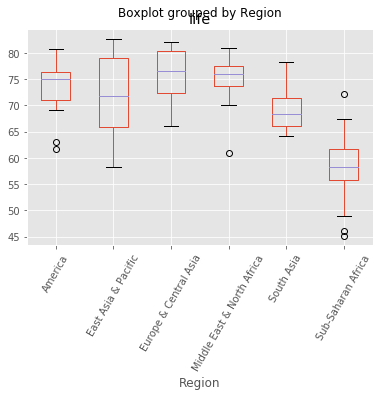

In [151]:
# Create a boxplot of life expectancy per region
gapminder.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()


### Creating dummy variables

In [152]:
# Create dummy variables: gapminder_region
gapminder_region = pd.get_dummies(gapminder)

# Print the columns of gapminder_region
print(gapminder_region.columns)

# Create dummy variables with drop_first=True: gapminder_region
gapminder_region = pd.get_dummies(gapminder, drop_first = True)

# Print the new columns of gapminder_region
print(gapminder_region.columns)


Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


### Regression with categorical features

In [153]:
X = gapminder_region.drop(['life'], axis = 1).values
y = gapminder_region.life.values

# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha = 0.5, normalize = True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv = 5)

# Print the cross-validated scores
print(ridge_cv)


[ 0.86808336  0.80623545  0.84004203  0.7754344   0.87503712]


## Handling missing data

- Data can be missing in the real world for many reasons
 - no observation was made, recording error, or data corruption
- Either way we need to deal with it.
- But watch out. Make sure to explore the data well. Not all missing data is labeled as NaN
 - It could be a 0, -1, 99999 or some string like 'None' 

#### PIMA Indians dataset
- It looks good when using `info`, but...
- Whoa, look a those zeros in insulin and tricepts, and bmi. huh

In [156]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [157]:
diabetes.head(15)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [160]:
np.sum(diabetes == 0)

pregnancies    111
glucose          5
diastolic       35
triceps        227
insulin        374
bmi             11
dpf              0
age              0
diabetes       500
dtype: int64

#### Dropping missing data
- pregnancies can be zero. and diabetes
- but the rest should not be zero. 
- Looks like we have all the data for age and dpf
- we need to replace zeros with NaN and then we can fugure out what to do with those values

In [163]:
diabetes.glucose.replace(0, np.nan, inplace=True)
diabetes.diastolic.replace(0, np.nan, inplace=True)
diabetes.triceps.replace(0, np.nan, inplace=True)
diabetes.insulin.replace(0, np.nan, inplace=True)
diabetes.bmi.replace(0, np.nan, inplace=True)

In [164]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        763 non-null float64
diastolic      733 non-null float64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


- If we just drop all rows where a single value is missinging we will just have half the data left. 
- We would be throwing out a lot of good data. Thats not ideal
- Similarly, if we threw away columns with missing data we would drop tons of useful data and most of our features. Also a bad idea

In [167]:
df = diabetes.dropna()
df.shape

(392, 9)

#### Impute missing data
- Making an educated guess about the missing values
- Example: Using the mean of the non-missing entries
- Imputers are known as transformers. There are other models that use the `transform()` method to transform data
- Once we have tranformed the data we can fit a model to it. Or, as we will see, we can do it all at once with pipelines

In [174]:
# X = diabetes.drop(['diabetes'], axis = 1).values
# y = diabetes.diabetes.values
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        763 non-null float64
diastolic      733 non-null float64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [176]:
X = diabetes.drop(['diabetes'], axis = 1).values
y = diabetes.diabetes.values

In [179]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

imp.fit(X)

X = imp.transform(X)

#### Imputing within a pipeline
- Note that in a pipeline each step must be a transformer and the last must be an estimator such as a classifier, regressor, or transformer

In [180]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

X = diabetes.drop(['diabetes'], axis = 1).values
y = diabetes.diabetes.values

imp = Imputer(missing_values = 'NaN', strategy='mean', axis=0)

logreg = LogisticRegression()

steps = [('imputation', imp),
         ('logistic_regression', logreg)]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3, 
    random_state = 42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

pipeline.score(X_test, y_test)

0.74891774891774887

### Dropping missing data

In [188]:
file = 'https://assets.datacamp.com/production/course_1939/datasets/house-votes-84.csv'
vote = pd.read_csv(file, names = vote_clean_columns) 
vote.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [189]:
# Convert '?' to NaN
vote[vote == '?'] = np.nan

# Print the number of NaNs
print(vote.isnull().sum())

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64


In [190]:
# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(vote.shape))

Shape of Original DataFrame: (435, 17)


In [191]:
# Drop missing values and print shape of new DataFrame
vote = vote.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(vote.shape))

Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


### Imputing missing data in a ML Pipeline I
- Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. 
- Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

- You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. 
- You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. 
- You will now be introduced to a fourth one - the Support Vector Machine, or SVM. 

In [192]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

### Imputing missing data in a ML Pipeline II

In [210]:
vote = pd.read_csv(file, names = vote_clean_columns) 
vote.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [211]:
vote[vote == '?'] = np.nan
vote[vote == 'y'] = True
vote[vote == 'n'] = False

In [212]:
vote.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,False,True,False,True,True,True,False,False,False,True,NaN,True,True,True,False,True
1,republican,False,True,False,True,True,True,False,False,False,False,False,True,True,True,False,NaN
2,democrat,NaN,True,True,NaN,True,True,False,False,False,False,True,False,True,True,False,False
3,democrat,False,True,True,False,NaN,True,False,False,False,False,True,False,True,False,False,True
4,democrat,True,True,True,False,True,True,False,False,False,False,True,NaN,True,True,True,True


In [213]:
y = vote_clean['party'].values
X = vote_clean.drop('party', axis=1).values

In [214]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

   democrat       0.99      0.96      0.98        85
 republican       0.94      0.98      0.96        46

avg / total       0.97      0.97      0.97       131



## Centering and scaling

#### Why scale your data?
- Many models use some form of distance to inform them
- Features on larger scales can unduly influence the model
- Example: k-NN uses distance expllicitly when making predictions
- We want features to be on a similar scale
- Normalizing (or scaling and centering)

#### Ways to normalize your data
- Standardization: Subtract the mean and divide by variance
 - All features are centered around zero and have variance one
- Can also subtract the minimum and divide by the range
 - Minimum zero and maximum one
- Can also normalize so the data ranges from -1 to +1
- We will cover standardization:
 - see scikit-learn docs for further details on other approaches


#### Scaling in scikit-learn

In [217]:
file = 'https://assets.datacamp.com/production/course_1939/datasets/winequality-red.csv'
redwine = pd.read_csv(file, sep = ';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [253]:
X = redwine.drop('quality', axis = 1).values
y = redwine.quality.values < 5

In [254]:
from sklearn.preprocessing import scale

X_scaled = scale(X)

print(np.mean(X), np.std(X))

print(np.mean(X_scaled), np.std(X_scaled))

8.13421922452 16.7265339794
2.54662653149e-15 1.0


#### Scaling in a pipeline

In [255]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2, 
    random_state = 21)

knn_scaled = pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy_score(y_test, y_pred)


0.94999999999999996

In [256]:
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
knn_unscaled.score(X_test, y_test)

0.94687500000000002

#### Cross Validation and scaling in a pipeling

In [257]:
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

parameters = {'knn__n_neighbors' : np.arange(1, 50)}

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2, 
    random_state = 21)

cv = GridSearchCV(pipeline, param_grid = parameters)

cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

print(cv.best_params_)

{'knn__n_neighbors': 10}


In [258]:
print(cv.score(X_test, y_test))

0.946875


In [259]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.95      1.00      0.97       303
       True       0.00      0.00      0.00        17

avg / total       0.90      0.95      0.92       320



/Users/williamsurles/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Centering and scaling your data
- In the video, Hugo demonstrated how significantly the performance of a model can improve if the features are scaled.
- Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.

In [260]:
file = 'https://assets.datacamp.com/production/course_1939/datasets/white-wine.csv'
whitewine = pd.read_csv(file)
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [262]:
X = whitewine.drop('quality', axis = 1).values
y = whitewine.quality.values > 5

In [264]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))
print('--------------------------------')
# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571
--------------------------------
Mean of Scaled Features: 2.7314972981668206e-15
Standard Deviation of Scaled Features: 0.9999999999999999


### Centering and scaling in a pipeline

In [265]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))


Accuracy with Scaling: 0.7700680272108843
Accuracy without Scaling: 0.6979591836734694


### Bringing it all together I: Pipeline for classification

In [267]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2, 
    random_state = 21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid = parameters, cv = 3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print('--------------------------------')
print(classification_report(y_test, y_pred))
print('--------------------------------')
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.7795918367346939
--------------------------------
             precision    recall  f1-score   support

      False       0.67      0.63      0.65       318
       True       0.83      0.85      0.84       662

avg / total       0.78      0.78      0.78       980

--------------------------------
Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


### Bringing it all together II: Pipeline for regression

In [268]:
gapminder_region = pd.get_dummies(gapminder, drop_first = True)
X = gapminder_region.drop(['life'], axis = 1).values
y = gapminder_region.life.values

In [269]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.4,
    random_state = 42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid = parameters, cv = 3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


/Users/williamsurles/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/williamsurles/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/williamsurles/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016549771036


## Final thoughts

- For more info checkout:
 - Scikit documentation
 - 'Introduction to Machine Learning in Python' (has a lizard on it)